In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import scipy.stats as stats

from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use("seaborn-v0_8-muted")

In [35]:

data_path = "../data/processed/cleaned_gravity_speed_data.csv"
model_path = "../models/rf_model.joblib"

df = pd.read_csv(data_path)
model = joblib.load(model_path)

target_col = "combined_dilation"
feature_cols = df.select_dtypes(include=[np.number]).columns.drop(target_col)

X = df[feature_cols]
df[f"{target_col}_pred"] = model.predict(X)

print(f"Data shape: {df.shape}")
print(f"Features used for prediction: {list(feature_cols)}")
print(f"Predictions added to column: {target_col}_pred")

Data shape: (1000, 10)
Features used for prediction: ['mass_kg', 'radius_m', 'velocity_m_s', 'gravitational_dilation', 'velocity_dilation', 'time_far_s', 'time_near_s', 'time_difference_s']
Predictions added to column: combined_dilation_pred


In [36]:
df["residuals"] = df[f"{target_col}_pred"] - df[target_col]

rmse = np.sqrt(mean_squared_error(df[target_col], df[f"{target_col}_pred"]))
mae = mean_absolute_error(df[target_col], df[f"{target_col}_pred"])

print(f"RMSE: {rmse:.6f}")
print(f"MAE: {mae:.6f}")

RMSE: 0.000273
MAE: 0.000138


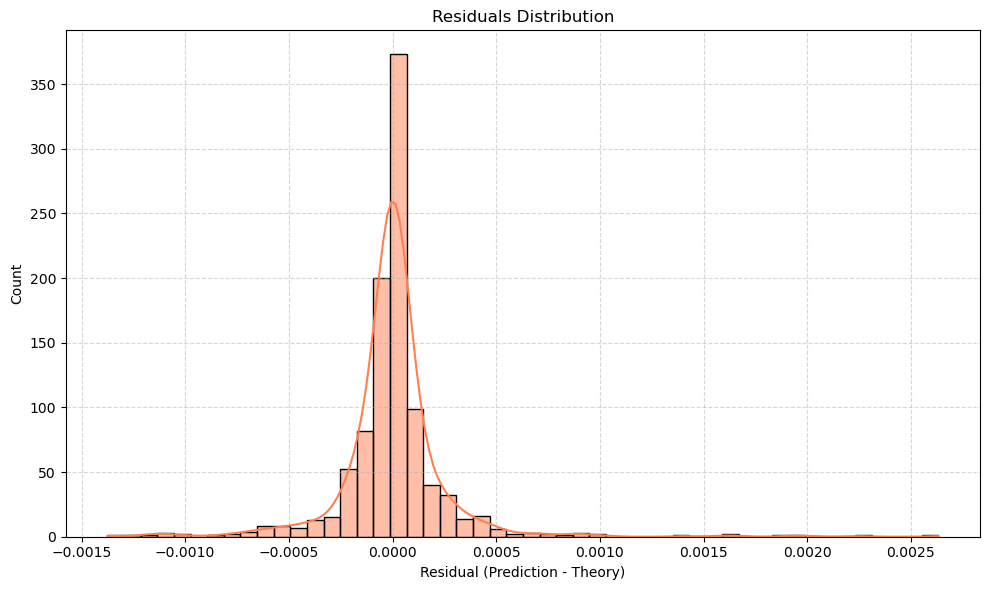

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df["residuals"], bins=50, kde=True, color="coral")
plt.title("Residuals Distribution")
plt.xlabel("Residual (Prediction - Theory)")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

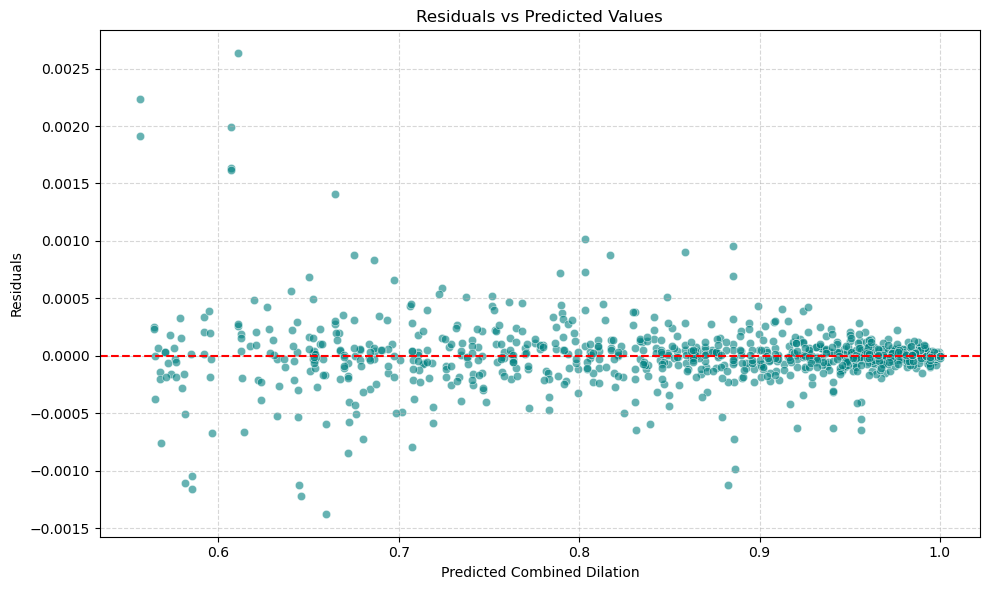

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["combined_dilation_pred"], y=df["residuals"], alpha=0.6, color="teal")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Combined Dilation")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [39]:
threshold = np.percentile(np.abs(df["residuals"]), 95)
outliers = df[np.abs(df["residuals"]) >= threshold]

print(f"Number of outliers (top 5% residuals): {len(outliers)}")
outliers[["mass_kg", "velocity_m_s", "residuals"]]

Number of outliers (top 5% residuals): 50


,mass_kg,velocity_m_s,residuals
54,1.064532e+29,1.387660e+08,-0.000728
66,3.145654e+29,2.219575e+08,-0.000578
72,7.439233e+28,2.387964e+08,0.001631
98,6.414355e+29,2.071298e+08,0.000592
120,2.591195e+29,2.245158e+08,0.001410
139,4.981870e+29,1.791368e+08,0.001020
184,4.984805e+29,1.384863e+08,-0.000986
208,4.394754e+29,2.219171e+08,-0.000849
218,3.155921e+29,2.083661e+08,-0.000588
291,3.063073e+29,2.496583e+08,0.001911


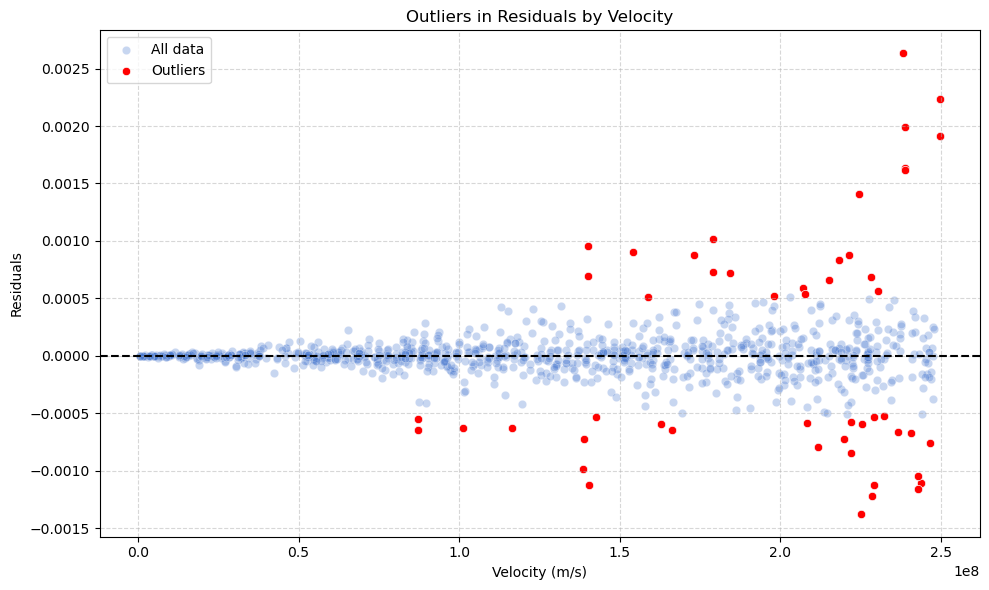

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["velocity_m_s"], y=df["residuals"], alpha=0.3, label="All data")
sns.scatterplot(x=outliers["velocity_m_s"], y=outliers["residuals"], color="red", label="Outliers")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Residuals")
plt.title("Outliers in Residuals by Velocity")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

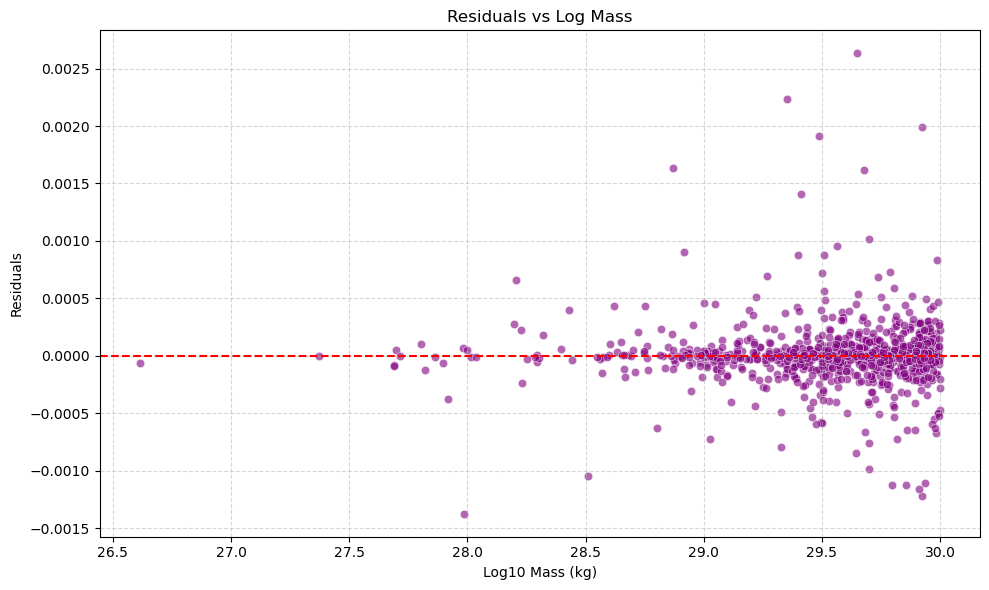

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log10(df["mass_kg"]), y=df["residuals"], alpha=0.6, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Log10 Mass (kg)")
plt.ylabel("Residuals")
plt.title("Residuals vs Log Mass")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
df["velocity_bin"] = pd.qcut(df["velocity_m_s"], q=5)
summary = df.groupby("velocity_bin", observed=False)["residuals"].agg(["mean", "std", "count"])
print(summary)

                                        mean       std  count
velocity_bin                                                 
(520536.447, 54673102.864]      2.017560e-07  0.000033    200
(54673102.864, 101632413.343]  -1.283588e-05  0.000116    200
(101632413.343, 152225126.784] -8.967184e-06  0.000208    200
(152225126.784, 203540350.625]  3.106143e-05  0.000247    200
(203540350.625, 249737240.529]  2.003129e-05  0.000504    200


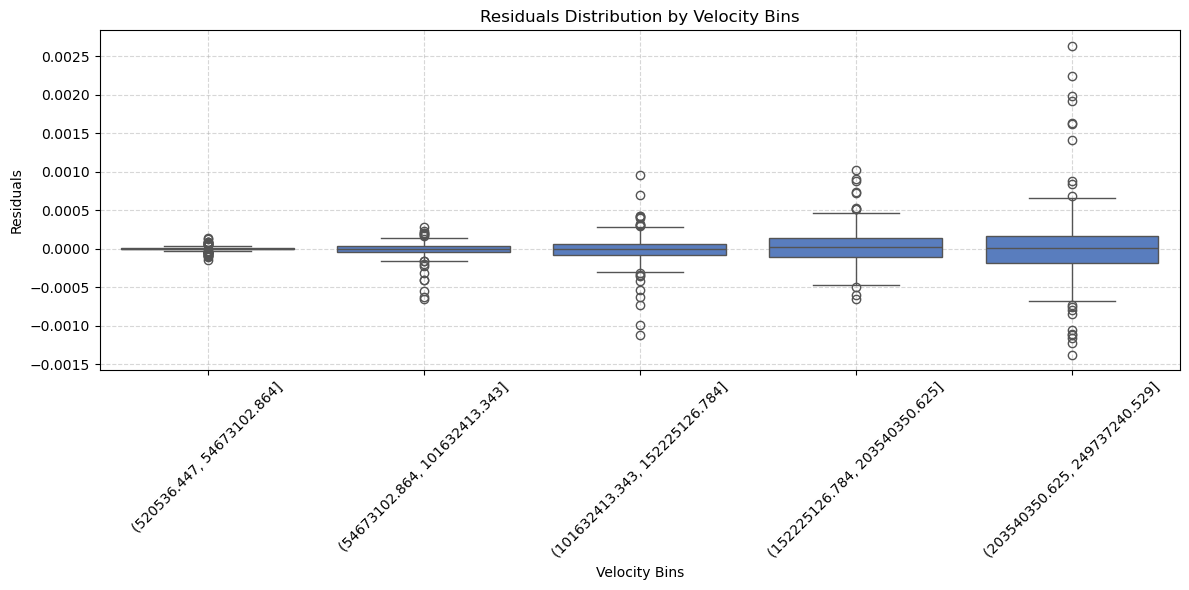

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="velocity_bin", y="residuals", data=df)
plt.xticks(rotation=45)
plt.xlabel("Velocity Bins")
plt.ylabel("Residuals")
plt.title("Residuals Distribution by Velocity Bins")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


📊 Bias Detection: Correlation between residuals and features

velocity_m_s: Pearson correlation = 0.0453, p-value = 0.1519 -> Not Significant
mass_kg: Pearson correlation = -0.0256, p-value = 0.4195 -> Not Significant
radius_m: Pearson correlation = -0.0042, p-value = 0.8936 -> Not Significant
gravitational_dilation: Pearson correlation = -0.0094, p-value = 0.7658 -> Not Significant


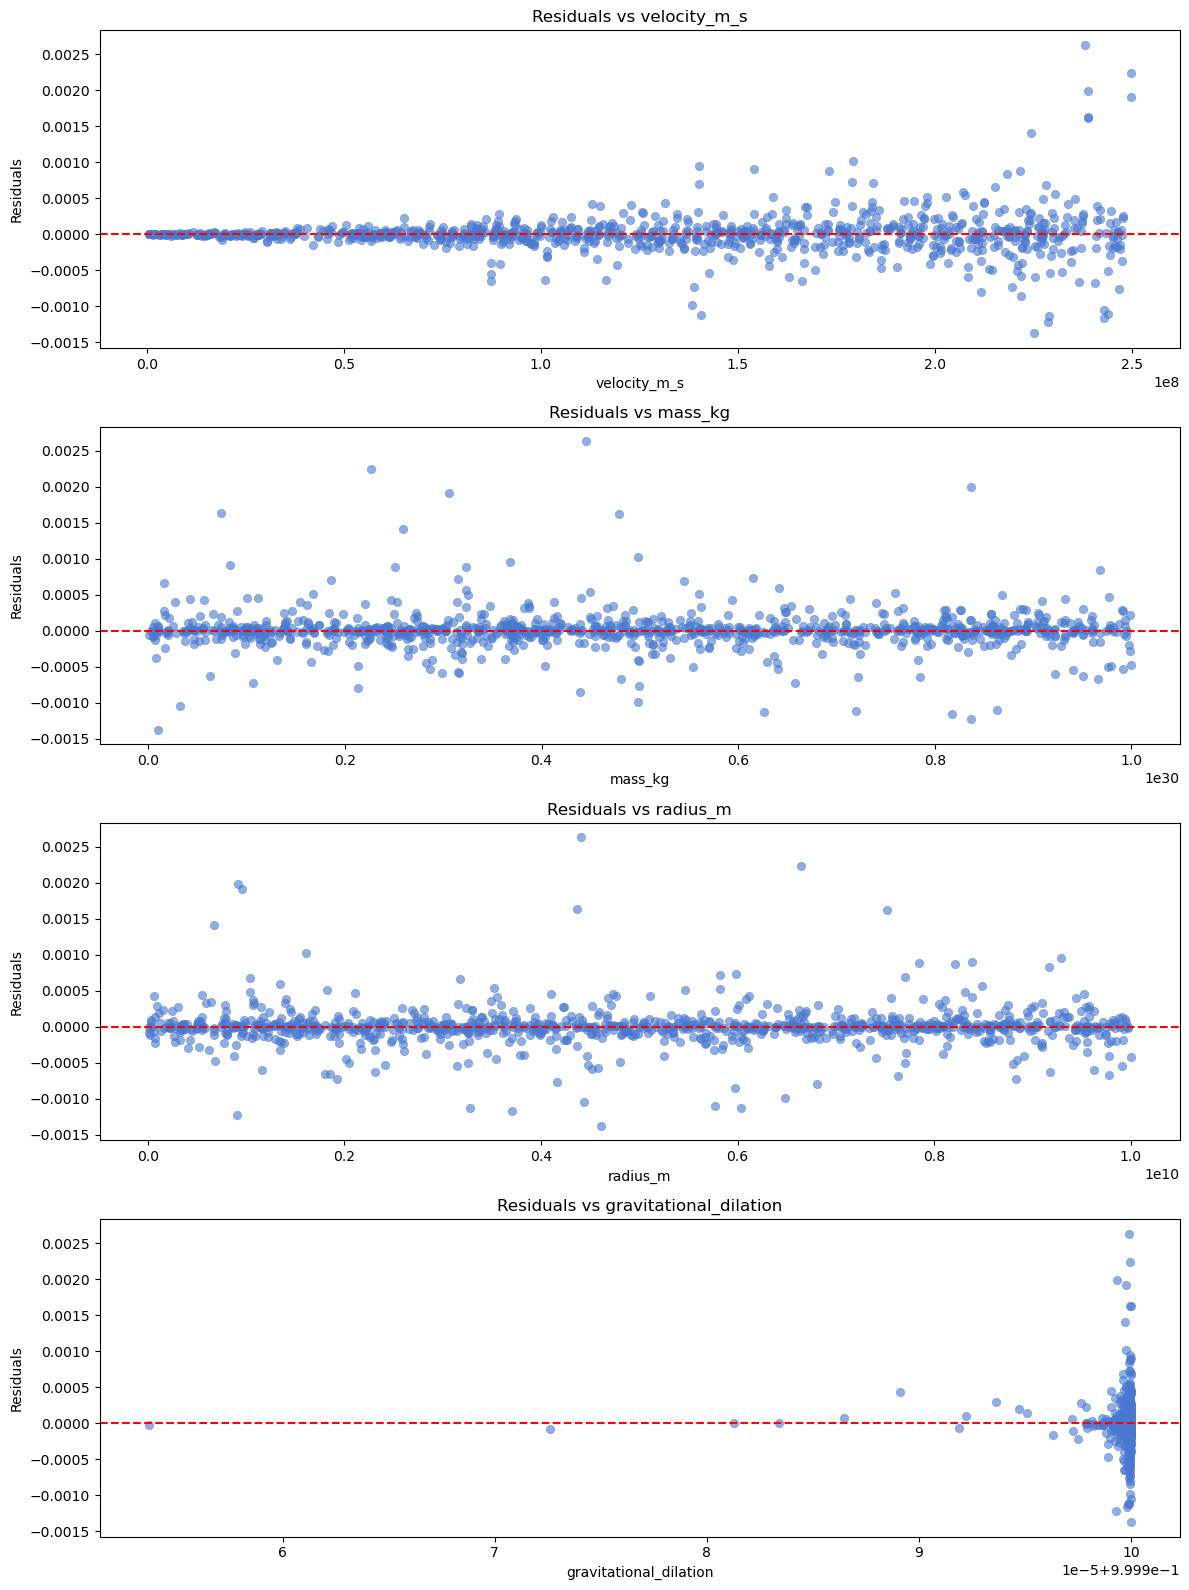


📝 Residuals Summary by Velocity Bins:
                                        mean       std  count
velocity_bin                                                 
(520536.447, 54673102.864]      2.017560e-07  0.000033    200
(54673102.864, 101632413.343]  -1.283588e-05  0.000116    200
(101632413.343, 152225126.784] -8.967184e-06  0.000208    200
(152225126.784, 203540350.625]  3.106143e-05  0.000247    200
(203540350.625, 249737240.529]  2.003129e-05  0.000504    200


In [46]:
features_to_check = ["velocity_m_s", "mass_kg", "radius_m", "gravitational_dilation"]

print("📊 Bias Detection: Correlation between residuals and features\n")
for feature in features_to_check:
    corr, pval = stats.pearsonr(df[feature], df["residuals"])
    signif = "Significant" if pval < 0.05 else "Not Significant"
    print(f"{feature}: Pearson correlation = {corr:.4f}, p-value = {pval:.4g} -> {signif}")

plt.figure(figsize=(12, 4 * len(features_to_check)))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(len(features_to_check), 1, i)
    sns.scatterplot(x=df[feature], y=df["residuals"], alpha=0.6, edgecolor=None)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

df["velocity_bin"] = pd.qcut(df["velocity_m_s"], q=5, duplicates='drop')
summary = df.groupby("velocity_bin", observed=True)["residuals"].agg(["mean", "std", "count"])
print("\n📝 Residuals Summary by Velocity Bins:")
print(summary)

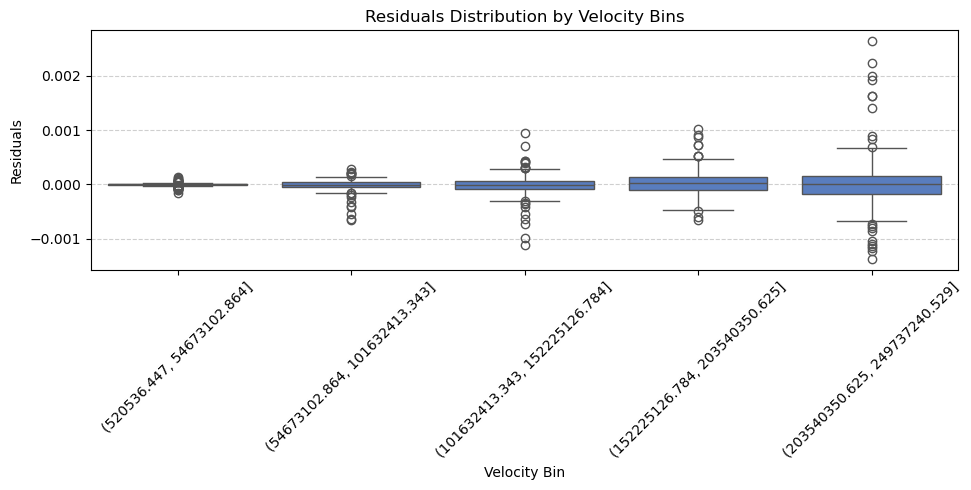

In [47]:
df["velocity_bin"] = pd.qcut(df["velocity_m_s"], q=5, duplicates='drop')
plt.figure(figsize=(10, 5))
sns.boxplot(x="velocity_bin", y="residuals", data=df)
plt.xticks(rotation=45)
plt.title("Residuals Distribution by Velocity Bins")
plt.xlabel("Velocity Bin")
plt.ylabel("Residuals")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

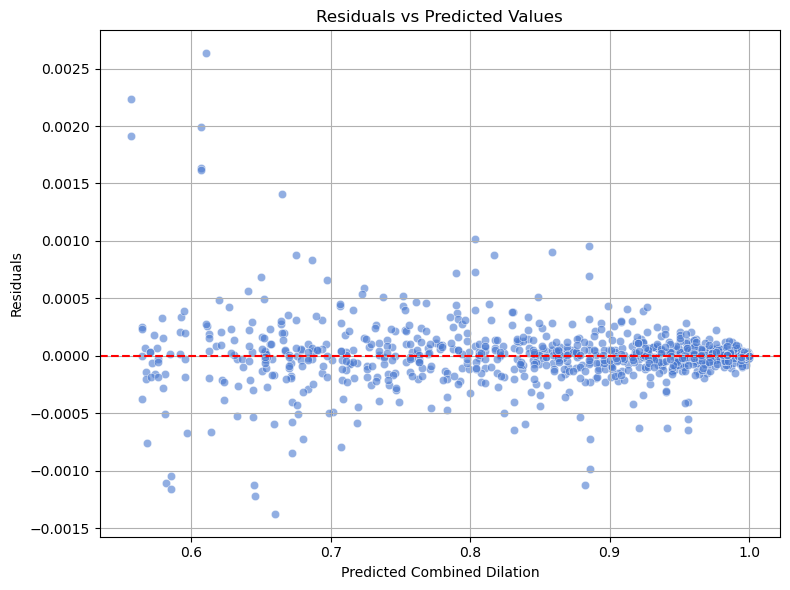

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df[f"{target_col}_pred"], y=df["residuals"], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Combined Dilation")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

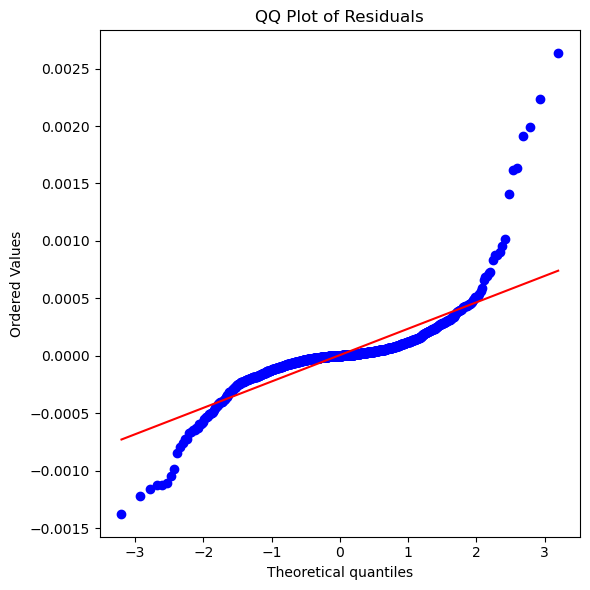

In [49]:
plt.figure(figsize=(6, 6))
stats.probplot(df["residuals"], dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()